In [20]:
from google.colab import files
files.upload()





Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niggasus","key":"c463e00753eb3ea16573446cb0bfc9ef"}'}

In [21]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [22]:
!kaggle datasets download -d ashutosh598/shoes-price-for-various-brands

Dataset URL: https://www.kaggle.com/datasets/ashutosh598/shoes-price-for-various-brands
License(s): CC0-1.0
shoes-price-for-various-brands.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!unzip dataset.zip


Archive:  dataset.zip
  inflating: data.csv                


In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [25]:
df1 = pd.read_csv("dataset.csv")
df1.head()

,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118


In [26]:
print("Unique brands:", df1['brand'].nunique())
print("Unique colors:", df1['color'].nunique())


Unique brands: 30
Unique colors: 115


In [27]:
brand_stats = df1['brand'].value_counts(ascending=False)
color_stats = df1['color'].value_counts(ascending=False)

print("Brands:\n", brand_stats)
print("Colors:\n", color_stats)


Brands:
 brand
Crocs                     1808
Franco Leone               630
Tresmode                   618
Nike                       236
Tory Burch                 214
FILA                       187
Woodland                   176
LaBriza                    168
Buckaroo                   148
Reebok                     139
Bata                       137
PUMA                       135
Vanilla Moon               127
Adidas                     108
Toni Rossi                 108
Liberty                    106
Toms                        95
Converse                    86
Hidesign                    82
Numero Uno                  53
Umbro                       41
Hush Puppies                40
Asics                       39
Lavie                       38
Footin                      38
Lee Cooper                  35
Imperial India Company      34
Havaianas                   25
Power                       19
Sting                        9
Name: count, dtype: int64
Colors:
 color
Black         

In [28]:
color_stats = df1['color'].value_counts()

# colors with less than 10 count
rare_colors = color_stats[color_stats < 10]
print("Colors with less than 10 count:\n", rare_colors)


Colors with less than 10 count:
 color
Camel Brown          9
Maroon               9
Cream                9
Dark Tan             9
Tobacco              8
                    ..
Gold & Silver        2
Navy & Red           1
Teak                 1
Green & Blue         1
Turquoise & White    1
Name: count, Length: 79, dtype: int64


In [29]:
df1['color'] = df1['color'].apply(lambda x: 'Other' if x in rare_colors.index else x)


In [30]:
print(df1['color'].value_counts())


color
Black              1386
Brown               745
Blue                688
Grey                320
Tan                 316
Other               310
White               263
Red                 210
Pink                195
Gold                150
Beige               133
Green               122
Navy                116
Orange               97
Purple               95
Silver               81
Camel                43
Yellow               41
Multi Color          36
Off White            34
Olive                32
Tan Light Brown      31
Pewter               30
Khaki                26
Multi                22
Gray                 22
Black & White        17
Bordo                16
Navy Blue            14
Cherry               13
Black & Red          12
Light Brown          11
Nude                 11
Black & Green        11
Champagne            10
Black & Blue         10
Blue & White         10
Name: count, dtype: int64


In [31]:
print(df1['color'].value_counts())


color
Black              1386
Brown               745
Blue                688
Grey                320
Tan                 316
Other               310
White               263
Red                 210
Pink                195
Gold                150
Beige               133
Green               122
Navy                116
Orange               97
Purple               95
Silver               81
Camel                43
Yellow               41
Multi Color          36
Off White            34
Olive                32
Tan Light Brown      31
Pewter               30
Khaki                26
Multi                22
Gray                 22
Black & White        17
Bordo                16
Navy Blue            14
Cherry               13
Black & Red          12
Light Brown          11
Nude                 11
Black & Green        11
Champagne            10
Black & Blue         10
Blue & White         10
Name: count, dtype: int64


In [32]:
print(df1.describe())


              price   offer_price
count   5679.000000   5679.000000
mean    4945.126255   4007.745026
std     5344.881308   4761.543884
min     1346.000000    773.000000
25%     2942.000000   1968.000000
50%     3742.000000   2868.000000
75%     4646.000000   4048.000000
max    37947.000000  34123.000000


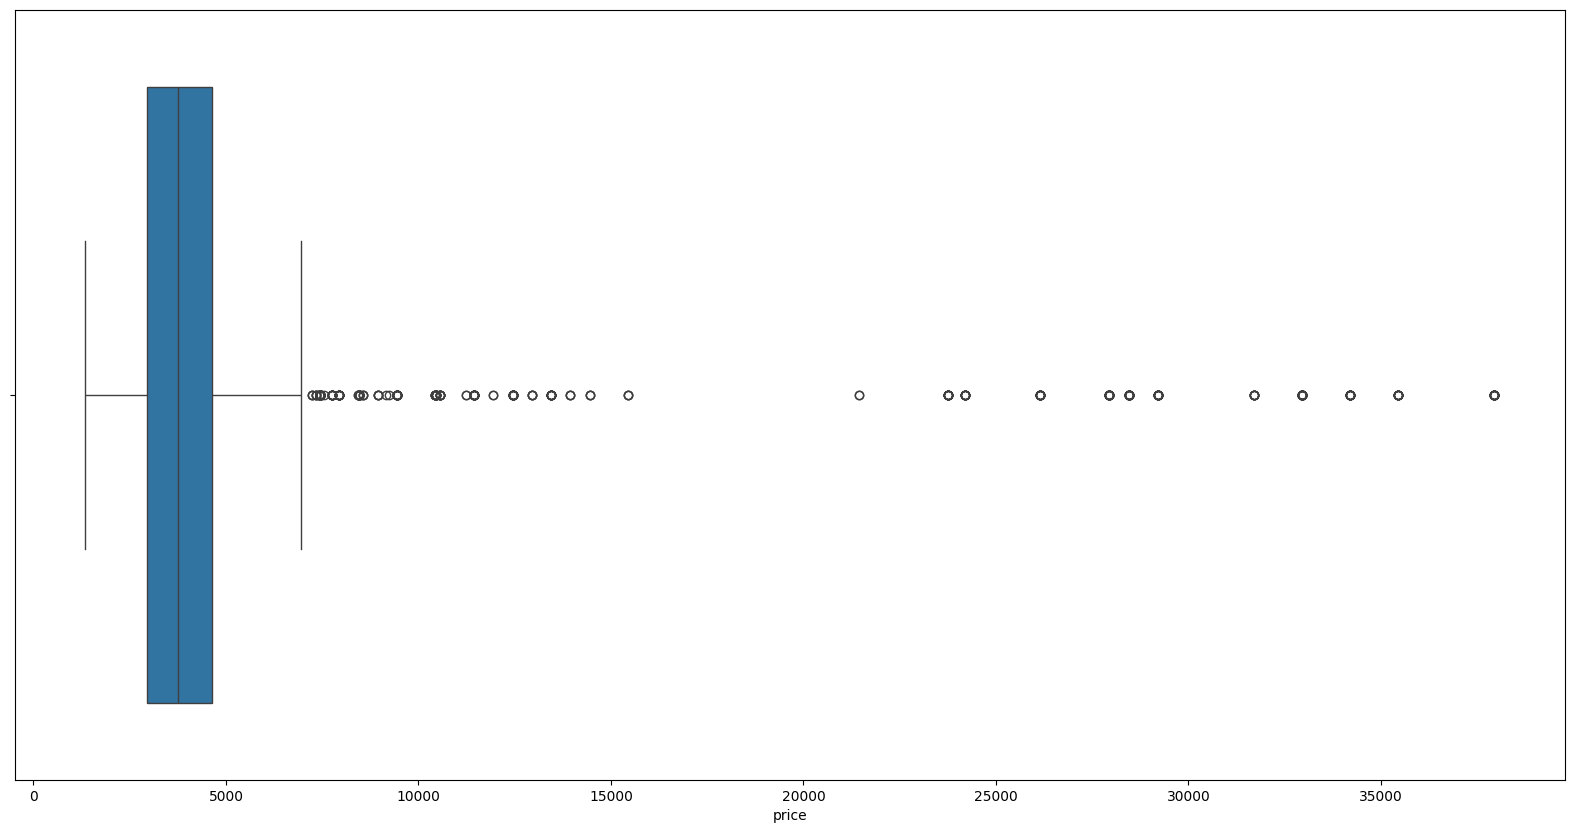

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df1['price'])
plt.show()


In [34]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['price'] >= lower_limit) & (df1['price'] <= upper_limit)]


In [35]:
print("Before:", df1.shape)
print("After:", df2.shape)


Before: (5679, 5)
After: (5182, 5)


In [36]:
df2.dtypes


,0
brand,object
color,object
size,object
price,int64
offer_price,int64


In [37]:
df3 = pd.get_dummies(df2, drop_first=True, dtype=int)


In [38]:
print(df3.head())
print(df3.shape)


   price  offer_price  brand_Asics  brand_Bata  brand_Buckaroo  \
0   4647         4153            0           0               0   
1   2446         1172            0           0               0   
2   2346         1898            0           0               0   
3   5942         5868            0           0               0   
4   2942         2118            0           0               0   

   brand_Converse  brand_Crocs  brand_FILA  brand_Footin  brand_Franco Leone  \
0               0            0           0             0                   0   
1               0            0           0             0                   0   
2               0            0           1             0                   0   
3               0            1           0             0                   0   
4               0            1           0             0                   0   

   ...  size_8  size_8.5  size_9  size_9.5  size_UK-06  size_UK-07  \
0  ...       0         0       0         0          

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# X (input features) aur y (target) alag karo
X = df3.drop("price", axis=1)   # yeh tum decide karo, agar tum "price" predict karna chahte ho
y = df3["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialize
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.8622630127975199
RMSE: 445.5223475152611


In [40]:
import joblib

# Save the model
joblib.dump(model, 'shoe_price_model.joblib')

print("Model saved successfully as 'shoe_price_model.joblib'")

Model saved successfully as 'shoe_price_model.joblib'


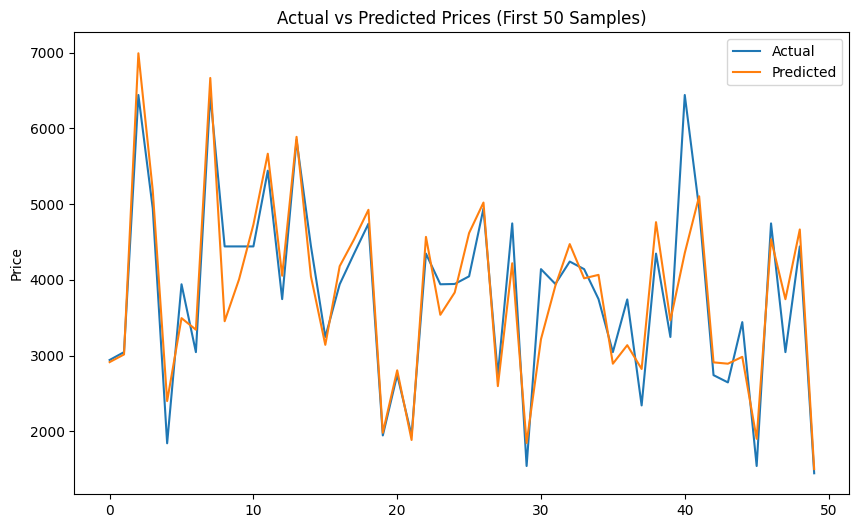

In [43]:

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison = comparison.reset_index(drop=True)


plt.figure(figsize=(10,6))
plt.plot(comparison[:50])  # First 50 samples for better visibility
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted Prices (First 50 Samples)')
plt.ylabel('Price')
plt.show()

